In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [10]:
fname = r'1.xlsx'
df = pd.read_excel(fname)
tmp = df.to_numpy()

In [32]:
tmp_max, tmp_min = tmp.max(axis=0), tmp.min(axis=0)
tmp2 = (tmp-tmp_min)/(tmp_max-tmp_min)

In [12]:
db = DBSCAN(eps=0.01, min_samples=2).fit(tmp2)
labels = db.labels_

6


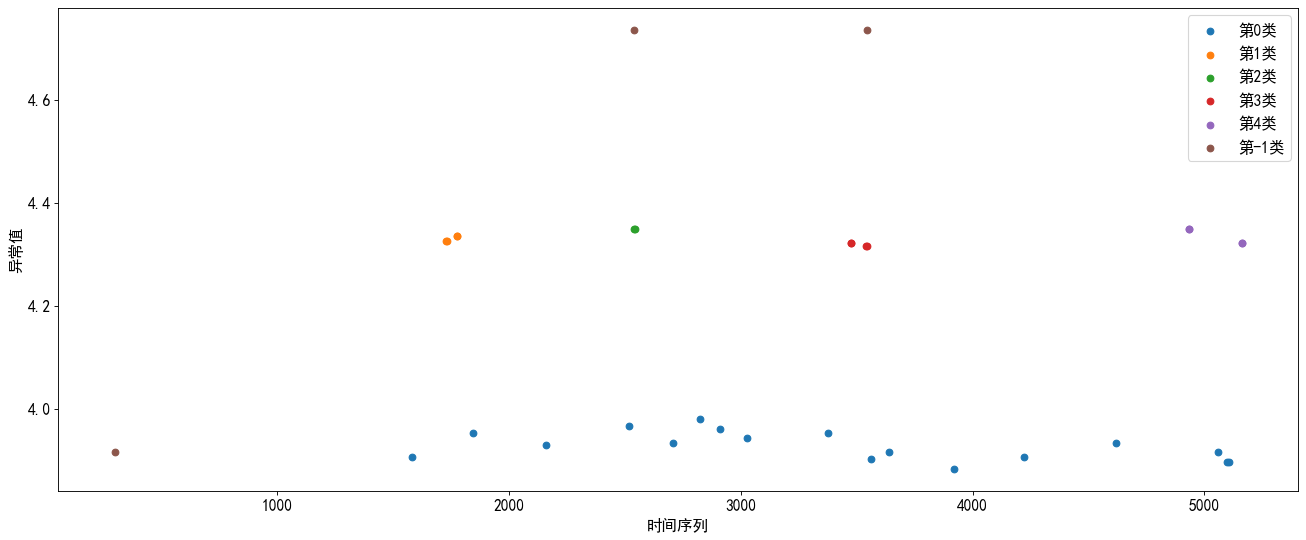

In [33]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 导入FontProperties

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

db = DBSCAN(eps=0.1, min_samples=2).fit(tmp2)
labels = db.labels_
df['labels'] = labels
tmp = df.to_numpy()

print(len(list(set(labels))))

plt.figure(figsize=(20,8), dpi=80)
for i in list(set(labels)):
    plt.scatter(tmp[labels==i, 0], tmp[labels==i, 1], label='第{}类'.format(i))
    plt.xlabel(u'时间序列', fontsize=14)
    plt.ylabel(u'异常值', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
plt.show()
# df.to_excel(r'cluster2.xlsx')